In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import PIL
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_read = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir=".", untar=True)

228827136/228813984 [==============================] - 73s 0us/step


In [5]:
data_read

'.\\datasets\\flower_photos'

In [8]:
import pathlib
data_read = pathlib.Path(data_read)
data_read

WindowsPath('datasets/flower_photos')

In [13]:
imag_count= len(list(data_read.glob('*/*.jpg')))
imag_count

3670

In [16]:
roses = list(data_read.glob('roses/*'))
roses[:3]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg')]

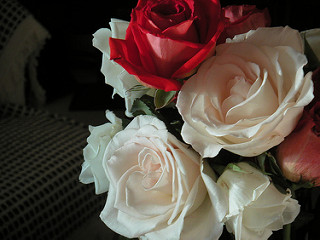

In [18]:
PIL.Image.open(str(roses[1]))

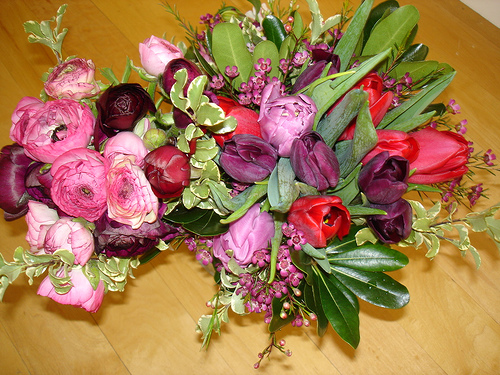

In [22]:
tulips = list(data_read.glob('tulips/*'))
PIL.Image.open(str(tulips[10]))

In [24]:
flowers_images_dict = {
    'roses':list(data_read.glob('roses/*')),
    'daisy':list(data_read.glob('daisy/*')),
    'dandelions':list(data_read.glob('dandelions/*')), 
    'sunflower':list(data_read.glob('sunflower/*')), 
    'tulips':list(data_read.glob('tulips/*')),
}

In [25]:
flower_labels_dictionary = {
    'roses': 0, 
    'daisy':1, 
    'dandelion':2, 
    'sunflower':3, 
    'tulips':4
}

In [31]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [34]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

# X,Y, RGB(colours)

(240, 179, 3)

In [35]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [42]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))  # Added the missing ')'
        
        resize_img = cv2.resize(img, (180, 180))
        X.append(resize_img)
        y.append(flower_labels_dictionary[flower_name])

In [46]:
X[0].shape

(180, 180, 3)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [49]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [52]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(), 
    layers.Conv2D(32, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), 
        layers.Dense(128, activation='relu'), 
        layers.Dense(num_classes)
])

model.compile(optimizer= 'adam', 
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
             metrics=["accuracy"])
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
49/49 [==============================] - 45s 838ms/step - loss: 1.0873 - accuracy: 0.4994
Epoch 2/30
49/49 [==============================] - 35s 708ms/step - loss: 0.7802 - accuracy: 0.6622
Epoch 3/30
49/49 [==============================] - 35s 719ms/step - loss: 0.6531 - accuracy: 0.7188
Epoch 4/30
49/49 [==============================] - 35s 725ms/step - loss: 0.5359 - accuracy: 0.7819
Epoch 5/30
49/49 [==============================] - 34s 700ms/step - loss: 0.3591 - accuracy: 0.8616
Epoch 6/30
49/49 [==============================] - 30s 608ms/step - loss: 0.2501 - accuracy: 0.9118
Epoch 7/30
49/49 [==============================] - 36s 738ms/step - loss: 0.1706 - accuracy: 0.9382
Epoch 8/30
49/49 [==============================] - 34s 701ms/step - loss: 0.1078 - accuracy: 0.9691
Epoch 9/30
49/49 [==============================] - 34s 694ms/step - loss: 0.0453 - accuracy: 0.9903
Epoch 10/30
49/49 [==============================] - 39s 792ms/step - loss: 0.0344 - accura

In [53]:
model.evaluate(X_test_scaled, y_test)

17/17 [==============================] - 27s 201ms/step - loss: 2.3653 - accuracy: 0.6301


[2.3652937412261963, 0.6300578117370605]

In [55]:
predictions= model.predict(X_test_scaled)
predictions

array([[  5.132427  ,   8.857753  , -23.392801  , -25.44754   ,
         26.031143  ],
       [  7.3059354 ,   5.09361   ,  -7.283946  ,  -8.925075  ,
          0.10715069],
       [  3.7362537 ,  35.86775   , -33.455437  , -38.671684  ,
         20.030539  ],
       ...,
       [ 14.148835  ,  -0.7856981 , -10.962897  , -10.772751  ,
          5.0884786 ],
       [ 19.374058  ,  23.052427  , -28.34749   , -31.917057  ,
          5.416194  ],
       [  6.3085628 ,   3.9993517 ,  -9.690061  , -11.178052  ,
          7.127568  ]], dtype=float32)

In [56]:
#making a number from real numbers to Probability

score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8.3907925e-10, 3.4809016e-08, 3.4312668e-22, 4.3963458e-23,
       1.0000000e+00], dtype=float32)>

In [57]:
np.argmax(score)

4

In [71]:
## Using data augmentation!!

data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.7)
])

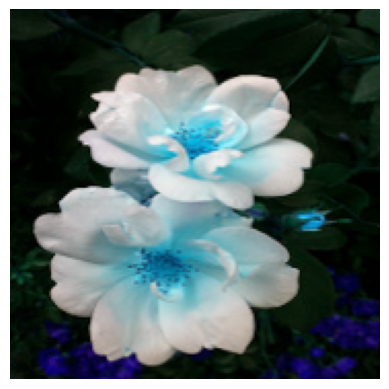

In [72]:
plt.axis("off")
plt.imshow(X[0])

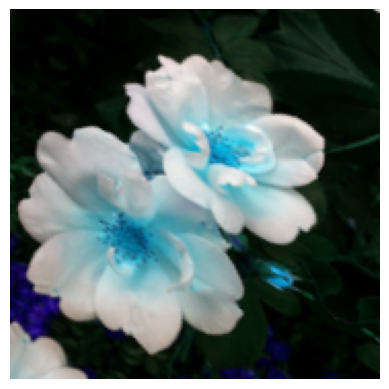

In [74]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [77]:
img_height = 180
img_width = 180
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1), 
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [81]:
 num_classes = 5
model = Sequential([
    data_aug,
    layers.Conv2D(16, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(), 
    layers.Conv2D(32, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(), 
        layers.Dense(128, activation='relu'), 
        layers.Dense(num_classes)
])

model.compile(optimizer= 'adam', 
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
             metrics=["accuracy"])
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
49/49 [==============================] - 45s 782ms/step - loss: 1.0575 - accuracy: 0.4942
Epoch 2/30
49/49 [==============================] - 32s 654ms/step - loss: 0.8341 - accuracy: 0.6158
Epoch 3/30
49/49 [==============================] - 32s 661ms/step - loss: 0.7707 - accuracy: 0.6409
Epoch 4/30
49/49 [==============================] - 32s 659ms/step - loss: 0.6883 - accuracy: 0.6911
Epoch 5/30
49/49 [==============================] - 32s 649ms/step - loss: 0.6772 - accuracy: 0.6982
Epoch 6/30
49/49 [==============================] - 37s 756ms/step - loss: 0.6226 - accuracy: 0.7265
Epoch 7/30
49/49 [==============================] - 35s 719ms/step - loss: 0.6291 - accuracy: 0.7246
Epoch 8/30
49/49 [==============================] - 32s 650ms/step - loss: 0.6210 - accuracy: 0.7297
Epoch 9/30
49/49 [==============================] - 32s 662ms/step - loss: 0.5749 - accuracy: 0.7490
Epoch 10/30
49/49 [==============================] - 37s 752ms/step - loss: 0.5740 - accura

In [83]:
model.evaluate(X_train_scaled, y_test)model.evaluate(X_test_scaled, y_test)

17/17 [==============================] - 4s 153ms/step - loss: 0.8266 - accuracy: 0.7129


[0.8266287446022034, 0.712909460067749]